In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Credit Risk - Part 1
Default = pd.read_csv('Credit_RiskProject_Data.csv')

In [3]:
Default.head()

,Company_Code,Networth Next Year,Capital Employed,Net Working Capital,Current Assets,Total Sales,Retained Earnings,PBDT,PBIT,PBT,...,EPS (Annualised) (Adjusted) (Unit Curr),APATM (%)[Latest],Creditors Velocity (Days),Total Liabilities,Total Equity,Market Value of Equity,total assets,Cost of Production,Current Ratio,Gross Block
0,16974,-8021.60,-1007.24,-1076.34,40.50,0.00,7.60,-926.52,-185.53,-932.99,...,0.0,0.00,0.0,5936.03,419.36,0.00,6355.39,137.67,0.02,474.30
1,21214,-3986.19,4458.20,-1098.88,486.86,2892.73,46.27,-4.32,35.53,-615.25,...,0.0,-87.18,101.0,7410.18,1954.93,1544.39,9365.11,2572.46,0.08,9070.86
2,14852,-3192.58,7714.68,4496.25,9097.64,392.13,9.55,-1086.71,-381.10,-1185.89,...,0.0,-7961.51,558.0,6944.54,53.84,1220.81,6998.38,408.51,1.06,1281.54
3,2439,-3054.51,2353.88,-2612.42,1034.12,1354.39,223.85,-677.57,-336.73,-801.29,...,0.0,-51.58,63.0,2326.05,157.30,194.27,2483.35,1326.99,0.09,1033.69
4,23505,-2967.36,4675.33,1836.23,4685.81,38.72,9.82,-944.42,-710.13,-1006.69,...,0.0,274.79,346.0,5740.90,50.30,113.68,5791.20,186.29,0.50,1084.20


In [4]:
Default.columns = Default.columns.str.strip().str.replace('%', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '').str.replace('[', '').str.replace(']', '')

In [5]:
Default.head()

,Company_Code,Networth_Next_Year,Capital_Employed,Net_Working_Capital,Current_Assets,Total_Sales,Retained_Earnings,PBDT,PBIT,PBT,...,EPS_Annualised_Adjusted_Unit_Curr,APATM__Latest,Creditors_Velocity_Days,Total_Liabilities,Total_Equity,Market_Value_of_Equity,total_assets,Cost_of_Production,Current_Ratio,Gross_Block
0,16974,-8021.60,-1007.24,-1076.34,40.50,0.00,7.60,-926.52,-185.53,-932.99,...,0.0,0.00,0.0,5936.03,419.36,0.00,6355.39,137.67,0.02,474.30
1,21214,-3986.19,4458.20,-1098.88,486.86,2892.73,46.27,-4.32,35.53,-615.25,...,0.0,-87.18,101.0,7410.18,1954.93,1544.39,9365.11,2572.46,0.08,9070.86
2,14852,-3192.58,7714.68,4496.25,9097.64,392.13,9.55,-1086.71,-381.10,-1185.89,...,0.0,-7961.51,558.0,6944.54,53.84,1220.81,6998.38,408.51,1.06,1281.54
3,2439,-3054.51,2353.88,-2612.42,1034.12,1354.39,223.85,-677.57,-336.73,-801.29,...,0.0,-51.58,63.0,2326.05,157.30,194.27,2483.35,1326.99,0.09,1033.69
4,23505,-2967.36,4675.33,1836.23,4685.81,38.72,9.82,-944.42,-710.13,-1006.69,...,0.0,274.79,346.0,5740.90,50.30,113.68,5791.20,186.29,0.50,1084.20


In [6]:
print('The number of rows (observations) is',Default.shape[0],'\n''The number of columns (variables) is',Default.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 24


In [7]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Company_Code                       3586 non-null   int64  
 1   Networth_Next_Year                 3586 non-null   float64
 2   Capital_Employed                   3586 non-null   float64
 3   Net_Working_Capital                3586 non-null   float64
 4   Current_Assets                     3576 non-null   float64
 5   Total_Sales                        3586 non-null   float64
 6   Retained_Earnings                  3586 non-null   float64
 7   PBDT                               3586 non-null   float64
 8   PBIT                               3574 non-null   float64
 9   PBT                                3586 non-null   float64
 10  PBT_as___of_total_income           3586 non-null   float64
 11  PAT                                3586 non-null   float

In [8]:
Default.columns = Default.columns.str.replace('as___of', 'to')

In [9]:
Default.duplicated().sum()

0

In [10]:
Default.describe().T

,count,mean,std,min,25%,50%,75%,max
Company_Code,3586.0,16065.388734,19776.817379,4.00000,3029.2500,6077.500000,24269.5000,72493.00
Networth_Next_Year,3586.0,725.045251,4769.681004,-8021.60000,3.9850,19.015000,123.8025,111729.10
Capital_Employed,3586.0,2799.611054,26975.135385,-1824.75000,7.6025,39.090000,226.6050,714001.25
Net_Working_Capital,3586.0,410.809665,6301.218546,-13162.42000,0.9425,10.145000,61.1750,223257.56
Current_Assets,3576.0,1964.679298,22608.950227,-0.91000,3.9975,24.540000,135.1525,721166.00
Total_Sales,3586.0,1079.702579,9996.574173,-62.59000,1.4400,30.440000,234.4400,443775.16
Retained_Earnings,3586.0,48.729824,426.040665,-448.72000,0.0200,0.450000,3.6350,14143.40
PBDT,3586.0,116.268795,956.199566,-5874.53000,0.0000,0.795000,12.9450,23215.00
PBIT,3574.0,218.167440,1854.025961,-4812.95000,0.0000,1.150000,16.6925,41402.96
PBT,3586.0,85.752909,799.925768,-6032.34000,-0.0600,0.310000,7.4225,16798.00


In [11]:
#Outlier Treatment
def check_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([.25,.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

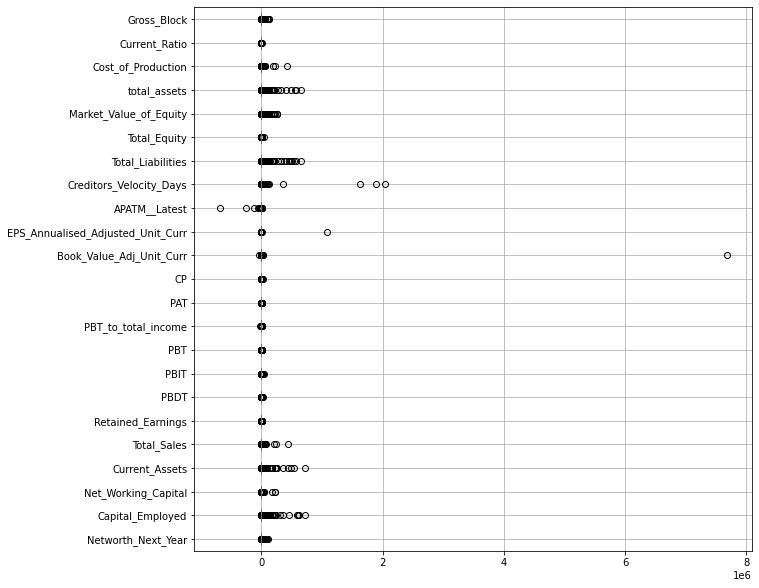

In [12]:
# Outliers_construct box plot
plt.figure(figsize=(10,10))
Default.drop(['Company_Code'], axis=1).boxplot(vert=0)

In [13]:
check_outlier(Default['Networth_Next_Year'])

(-175.74125, 303.52875000000006)

In [14]:
check_outlier(Default['Capital_Employed'])

(-320.90125, 555.1087500000001)

In [15]:
check_outlier(Default['Net_Working_Capital'])

(-89.40625, 151.52375)

In [16]:
check_outlier(Default['Current_Assets'])

(-192.735, 331.885)

In [17]:
check_outlier(Default['Total_Sales'])

(-348.06000000000006, 583.94)

In [18]:
check_outlier(Default['Retained_Earnings'])

(-5.4025, 9.0575)

In [19]:
check_outlier(Default['PBDT'])

(-19.4175, 32.3625)

In [20]:
check_outlier(Default['PBIT'])

(-25.03875, 41.73125)

In [21]:
check_outlier(Default['PBT'])

(-11.28375, 18.64625)

In [22]:
check_outlier(Default['PBT_to_total_income'])

(-6.0, 10.0)

In [23]:
check_outlier(Default['PAT'])

(-8.459999999999999, 13.939999999999998)

In [24]:
check_outlier(Default['CP'])

(-16.365000000000002, 27.275000000000002)

In [25]:
check_outlier(Default['Book_Value_Adj_Unit_Curr'])

(-72.325, 139.555)

In [26]:
check_outlier(Default['EPS_Annualised_Adjusted_Unit_Curr'])

(-6.19125, 10.318750000000001)

In [27]:
check_outlier(Default['APATM__Latest'])

(-11.115, 18.525)

In [28]:
check_outlier(Default['Creditors_Velocity_Days'])

(-113.5, 210.5)

In [29]:
check_outlier(Default['Total_Liabilities'])

(-173.68499999999997, 299.715)

In [30]:
check_outlier(Default['Total_Equity'])

(-19.93875, 43.23125)

In [31]:
check_outlier(Default['Market_Value_of_Equity'])

(-167.18625000000003, 278.64375000000007)

In [32]:
check_outlier(Default['total_assets'])

(-135.08375, 242.48625)

In [33]:
check_outlier(Default['Cost_of_Production'])

(-281.97499999999997, 472.4649999999999)

In [34]:
check_outlier(Default['Current_Ratio'])

(-1.955, 5.605)

In [35]:
check_outlier(Default['Gross_Block'])

(-196.41750000000002, 328.88250000000005)

In [36]:
# Dropping records higher than upper whisker
Default['Networth_Next_Year'] = np.where(Default['Networth_Next_Year'] >303.52875000000006, 19.015,Default['Networth_Next_Year'])
Default['Capital_Employed'] = np.where(Default['Capital_Employed'] >555.1087500000001, 39.09,Default['Capital_Employed'])
Default['Net_Working_Capital'] = np.where(Default['Net_Working_Capital'] >151.52375, 10.145,Default['Net_Working_Capital'])
Default['Current_Assets'] = np.where(Default['Current_Assets'] >331.885, 24.54,Default['Current_Assets'])
Default['Total_Sales'] = np.where(Default['Total_Sales'] >583.94, 30.44,Default['Total_Sales'])
Default['Retained_Earnings'] = np.where(Default['Retained_Earnings'] >9.0575, 0.45,Default['Retained_Earnings'])
Default['PBDT'] = np.where(Default['PBDT'] >32.3625, 0.795,Default['PBDT'])
Default['PBIT'] = np.where(Default['PBIT'] >41.73125, 1.15,Default['PBIT'])
Default['PBT'] = np.where(Default['PBT'] >18.64625, 0.31,Default['PBT'])
Default['PBT_to_total_income'] = np.where(Default['PBT_to_total_income'] >10.0, 0.407,Default['PBT_to_total_income'])
Default['PAT'] = np.where(Default['PAT'] >13.939999999999998, 0.255,Default['PAT'])
Default['CP'] = np.where(Default['CP'] >27.275000000000002, 0.74,Default['CP'])
Default['Book_Value_Adj_Unit_Curr'] = np.where(Default['Book_Value_Adj_Unit_Curr'] >139.555, 18.98,Default['Book_Value_Adj_Unit_Curr'])
Default['EPS_Annualised_Adjusted_Unit_Curr'] = np.where(Default['EPS_Annualised_Adjusted_Unit_Curr'] >10.318750000000001, 0.36,Default['EPS_Annualised_Adjusted_Unit_Curr'])
Default['APATM__Latest'] = np.where(Default['APATM__Latest'] >18.525, 1.59,Default['APATM__Latest'])
Default['Creditors_Velocity_Days'] = np.where(Default['Creditors_Velocity_Days'] >210.5, 36,Default['Creditors_Velocity_Days'])
Default['Total_Liabilities'] = np.where(Default['Total_Liabilities'] >299.715, 16.64,Default['Total_Liabilities'])
Default['Total_Equity'] = np.where(Default['Total_Equity'] >43.23125, 8.295,Default['Total_Equity'])
Default['Market_Value_of_Equity'] = np.where(Default['Market_Value_of_Equity'] >278.64375000000007, 8.37,Default['Market_Value_of_Equity'])
Default['total_assets'] = np.where(Default['total_assets'] >242.48625, 20.65,Default['total_assets'])
Default['Cost_of_Production'] = np.where(Default['Cost_of_Production'] >472.4649999999999, 25.99,Default['Cost_of_Production'])
Default['Current_Ratio'] = np.where(Default['Current_Ratio'] >5.605, 1.36,Default['Current_Ratio'])
Default['Gross_Block'] = np.where(Default['Gross_Block'] >328.88250000000005, 15.87,Default['Gross_Block'])

# Capping values lower than lower whisker
Default['Networth_Next_Year'] = np.where(Default['Networth_Next_Year'] <-175.74125, -175.74125,Default['Networth_Next_Year'])
Default['Capital_Employed'] = np.where(Default['Capital_Employed'] <-320.90125, -320.90125,Default['Capital_Employed'])
Default['Net_Working_Capital'] = np.where(Default['Net_Working_Capital'] <-89.40625, -89.40625,Default['Net_Working_Capital'])
Default['Current_Assets'] = np.where(Default['Current_Assets'] <-192.735, -192.735,Default['Current_Assets'])
Default['Total_Sales'] = np.where(Default['Total_Sales'] <-348.06000000000006, -348.06000000000006,Default['Total_Sales'])
Default['Retained_Earnings'] = np.where(Default['Retained_Earnings'] <-5.4025, -5.4025,Default['Retained_Earnings'])
Default['PBDT'] = np.where(Default['PBDT'] <-19.4175, -19.4175,Default['PBDT'])
Default['PBIT'] = np.where(Default['PBIT'] <-25.03875, -25.03875,Default['PBIT'])
Default['PBT'] = np.where(Default['PBT'] <-11.28375, -11.28375,Default['PBT'])
Default['PBT_to_total_income'] = np.where(Default['PBT_to_total_income'] <-6.0, -6.0,Default['PBT_to_total_income'])
Default['PAT'] = np.where(Default['PAT'] <-8.459999999999999, -8.459999999999999,Default['PAT'])
Default['CP'] = np.where(Default['CP'] <-16.365000000000002, -16.365000000000002,Default['CP'])
Default['Book_Value_Adj_Unit_Curr'] = np.where(Default['Book_Value_Adj_Unit_Curr'] <-72.325, -72.325,Default['Book_Value_Adj_Unit_Curr'])
Default['EPS_Annualised_Adjusted_Unit_Curr'] = np.where(Default['EPS_Annualised_Adjusted_Unit_Curr'] <-6.19125, -6.19125,Default['EPS_Annualised_Adjusted_Unit_Curr'])
Default['APATM__Latest'] = np.where(Default['APATM__Latest'] <-11.115, -11.115,Default['APATM__Latest'])
Default['Creditors_Velocity_Days'] = np.where(Default['Creditors_Velocity_Days'] <-113.5, -113.5,Default['Creditors_Velocity_Days'])
Default['Total_Liabilities'] = np.where(Default['Total_Liabilities'] <-173.68499999999997, -173.68499999999997,Default['Total_Liabilities'])
Default['Total_Equity'] = np.where(Default['Total_Equity'] <-19.93875, -19.93875,Default['Total_Equity'])
Default['Market_Value_of_Equity'] = np.where(Default['Market_Value_of_Equity'] <-167.18625000000003, -167.18625000000003,Default['Market_Value_of_Equity'])
Default['total_assets'] = np.where(Default['total_assets'] <-135.08375, -135.08375,Default['total_assets'])
Default['Cost_of_Production'] = np.where(Default['Cost_of_Production'] <-281.97499999999997, -281.97499999999997,Default['Cost_of_Production'])
Default['Current_Ratio'] = np.where(Default['Current_Ratio'] <-1.955, -1.955,Default['Current_Ratio'])
Default['Gross_Block'] = np.where(Default['Gross_Block'] <-196.41750000000002, -196.41750000000002,Default['Gross_Block'])

In [37]:
Default.describe().T

,count,mean,std,min,25%,50%,75%,max
Company_Code,3586.0,16065.388734,19776.817379,4.00000,3029.2500,6077.5000,24269.50000,72493.00
Networth_Next_Year,3586.0,29.557756,64.788068,-175.74125,3.9850,18.9975,32.67750,301.35
Capital_Employed,3586.0,67.445760,106.637217,-320.90125,7.6025,39.0650,69.45750,551.45
Net_Working_Capital,3586.0,15.707747,34.913948,-89.40625,0.9425,10.1425,20.28750,148.75
Current_Assets,3576.0,41.835187,61.832819,-0.91000,3.9975,24.5300,43.36750,331.58
Total_Sales,3586.0,68.302699,115.380833,-62.59000,1.4400,30.4300,66.74000,581.83
Retained_Earnings,3586.0,0.989793,1.745919,-5.40250,0.0200,0.4500,0.91000,9.05
PBDT,3586.0,1.405876,7.961626,-19.41750,0.0000,0.7925,1.88000,32.17
PBIT,3574.0,2.589657,9.718026,-25.03875,0.0000,1.1500,2.96750,41.50
PBT,3586.0,0.181434,5.029348,-11.28375,-0.0600,0.3100,0.79000,18.58


In [38]:
#Missing Value Treatment
Default.isnull().sum()

Company_Code                          0
Networth_Next_Year                    0
Capital_Employed                      0
Net_Working_Capital                   0
Current_Assets                       10
Total_Sales                           0
Retained_Earnings                     0
PBDT                                  0
PBIT                                 12
PBT                                   0
PBT_to_total_income                   0
PAT                                   0
CP                                    0
Book_Value_Adj_Unit_Curr             17
EPS_Annualised_Adjusted_Unit_Curr     4
APATM__Latest                         1
Creditors_Velocity_Days               8
Total_Liabilities                    59
Total_Equity                          0
Market_Value_of_Equity                0
total_assets                          0
Cost_of_Production                    0
Current_Ratio                         1
Gross_Block                           0
dtype: int64

In [39]:
col=list(Default.columns)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

Default = pd.DataFrame(imputer.fit_transform(Default))
Default.columns=col
Default.head()

,Company_Code,Networth_Next_Year,Capital_Employed,Net_Working_Capital,Current_Assets,Total_Sales,Retained_Earnings,PBDT,PBIT,PBT,...,EPS_Annualised_Adjusted_Unit_Curr,APATM__Latest,Creditors_Velocity_Days,Total_Liabilities,Total_Equity,Market_Value_of_Equity,total_assets,Cost_of_Production,Current_Ratio,Gross_Block
0,16974.0,-175.74125,-320.90125,-89.40625,40.50,0.00,7.60,-19.4175,-25.03875,-11.28375,...,0.0,0.000,0.0,16.64,8.295,0.00,20.65,137.67,0.02,15.87
1,21214.0,-175.74125,39.09000,-89.40625,24.54,30.44,0.45,-4.3200,35.53000,-11.28375,...,0.0,-11.115,101.0,16.64,8.295,8.37,20.65,25.99,0.08,15.87
2,14852.0,-175.74125,39.09000,10.14500,24.54,392.13,0.45,-19.4175,-25.03875,-11.28375,...,0.0,-11.115,36.0,16.64,8.295,8.37,20.65,408.51,1.06,15.87
3,2439.0,-175.74125,39.09000,-89.40625,24.54,30.44,0.45,-19.4175,-25.03875,-11.28375,...,0.0,-11.115,63.0,16.64,8.295,194.27,20.65,25.99,0.09,15.87
4,23505.0,-175.74125,39.09000,10.14500,24.54,38.72,0.45,-19.4175,-25.03875,-11.28375,...,0.0,1.590,36.0,16.64,8.295,113.68,20.65,186.29,0.50,15.87


In [40]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Company_Code                       3586 non-null   float64
 1   Networth_Next_Year                 3586 non-null   float64
 2   Capital_Employed                   3586 non-null   float64
 3   Net_Working_Capital                3586 non-null   float64
 4   Current_Assets                     3586 non-null   float64
 5   Total_Sales                        3586 non-null   float64
 6   Retained_Earnings                  3586 non-null   float64
 7   PBDT                               3586 non-null   float64
 8   PBIT                               3586 non-null   float64
 9   PBT                                3586 non-null   float64
 10  PBT_to_total_income                3586 non-null   float64
 11  PAT                                3586 non-null   float

In [41]:
Default.describe().T

,count,mean,std,min,25%,50%,75%,max
Company_Code,3586.0,16065.388734,19776.817379,4.00000,3029.2500,6077.5000,24269.50000,72493.00
Networth_Next_Year,3586.0,29.557756,64.788068,-175.74125,3.9850,18.9975,32.67750,301.35
Capital_Employed,3586.0,67.445760,106.637217,-320.90125,7.6025,39.0650,69.45750,551.45
Net_Working_Capital,3586.0,15.707747,34.913948,-89.40625,0.9425,10.1425,20.28750,148.75
Current_Assets,3586.0,41.786930,61.753265,-0.91000,4.0150,24.5300,43.19250,331.58
Total_Sales,3586.0,68.302699,115.380833,-62.59000,1.4400,30.4300,66.74000,581.83
Retained_Earnings,3586.0,0.989793,1.745919,-5.40250,0.0200,0.4500,0.91000,9.05
PBDT,3586.0,1.405876,7.961626,-19.41750,0.0000,0.7925,1.88000,32.17
PBIT,3586.0,2.584839,9.702104,-25.03875,0.0000,1.1500,2.94500,41.50
PBT,3586.0,0.181434,5.029348,-11.28375,-0.0600,0.3100,0.79000,18.58


In [42]:
#New Variables Creation
Default['Return_on_Total_Asset'] = Default['PBT']/Default['total_assets']
Default['Profit_Margin'] = Default['PBT']/Default['Total_Sales']
Default['Debt_to_Equity_Ratio'] = Default['Total_Liabilities']/Default['Total_Equity']

In [43]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Company_Code                       3586 non-null   float64
 1   Networth_Next_Year                 3586 non-null   float64
 2   Capital_Employed                   3586 non-null   float64
 3   Net_Working_Capital                3586 non-null   float64
 4   Current_Assets                     3586 non-null   float64
 5   Total_Sales                        3586 non-null   float64
 6   Retained_Earnings                  3586 non-null   float64
 7   PBDT                               3586 non-null   float64
 8   PBIT                               3586 non-null   float64
 9   PBT                                3586 non-null   float64
 10  PBT_to_total_income                3586 non-null   float64
 11  PAT                                3586 non-null   float

In [44]:
Default['Profit_Margin'].isnull().sum()

27

In [45]:
Default['Profit_Margin'].describe()

count    3559.000000
mean             NaN
std              NaN
min             -inf
25%        -0.028193
50%         0.010184
75%         0.056033
max              inf
Name: Profit_Margin, dtype: float64

In [46]:
Default.replace([np.inf, -np.inf], np.nan, inplace = True)

In [47]:
col=list(Default.columns)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

Default = pd.DataFrame(imputer.fit_transform(Default))
Default.columns=col
Default.describe().T

,count,mean,std,min,25%,50%,75%,max
Company_Code,3586.0,16065.388734,19776.817379,4.000000,3029.250000,6077.500000,24269.500000,72493.000000
Networth_Next_Year,3586.0,29.557756,64.788068,-175.741250,3.985000,18.997500,32.677500,301.350000
Capital_Employed,3586.0,67.445760,106.637217,-320.901250,7.602500,39.065000,69.457500,551.450000
Net_Working_Capital,3586.0,15.707747,34.913948,-89.406250,0.942500,10.142500,20.287500,148.750000
Current_Assets,3586.0,41.786930,61.753265,-0.910000,4.015000,24.530000,43.192500,331.580000
Total_Sales,3586.0,68.302699,115.380833,-62.590000,1.440000,30.430000,66.740000,581.830000
Retained_Earnings,3586.0,0.989793,1.745919,-5.402500,0.020000,0.450000,0.910000,9.050000
PBDT,3586.0,1.405876,7.961626,-19.417500,0.000000,0.792500,1.880000,32.170000
PBIT,3586.0,2.584839,9.702104,-25.038750,0.000000,1.150000,2.945000,41.500000
PBT,3586.0,0.181434,5.029348,-11.283750,-0.060000,0.310000,0.790000,18.580000


In [48]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Company_Code                       3586 non-null   float64
 1   Networth_Next_Year                 3586 non-null   float64
 2   Capital_Employed                   3586 non-null   float64
 3   Net_Working_Capital                3586 non-null   float64
 4   Current_Assets                     3586 non-null   float64
 5   Total_Sales                        3586 non-null   float64
 6   Retained_Earnings                  3586 non-null   float64
 7   PBDT                               3586 non-null   float64
 8   PBIT                               3586 non-null   float64
 9   PBT                                3586 non-null   float64
 10  PBT_to_total_income                3586 non-null   float64
 11  PAT                                3586 non-null   float

In [49]:
Default['Profit_Margin'].describe()

count    3586.000000
mean       -0.429094
std         7.137316
min      -295.000000
25%         0.000000
50%         0.010184
75%         0.046512
max        31.333333
Name: Profit_Margin, dtype: float64

In [50]:
#Transform target variable into 0 and 1
Default['default'] = np.where((Default['Networth_Next_Year'] > 0), 0, 1)

In [51]:
Default.head().T

,0,1,2,3,4
Company_Code,16974.000000,21214.000000,14852.000000,2439.000000,23505.000000
Networth_Next_Year,-175.741250,-175.741250,-175.741250,-175.741250,-175.741250
Capital_Employed,-320.901250,39.090000,39.090000,39.090000,39.090000
Net_Working_Capital,-89.406250,-89.406250,10.145000,-89.406250,10.145000
Current_Assets,40.500000,24.540000,24.540000,24.540000,24.540000
Total_Sales,0.000000,30.440000,392.130000,30.440000,38.720000
Retained_Earnings,7.600000,0.450000,0.450000,0.450000,0.450000
PBDT,-19.417500,-4.320000,-19.417500,-19.417500,-19.417500
PBIT,-25.038750,35.530000,-25.038750,-25.038750,-25.038750
PBT,-11.283750,-11.283750,-11.283750,-11.283750,-11.283750


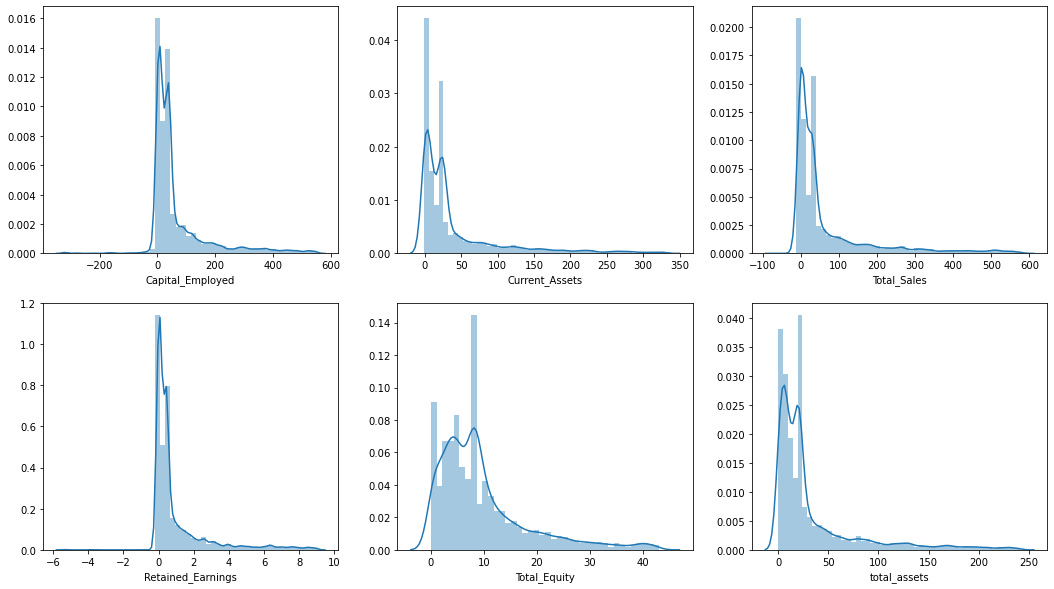

In [52]:
#Perform Univariate & bivariate analysis(including Heatmap)
#Univariate analysis
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,10)

a = sns.distplot(Default['Capital_Employed'] , ax=axes[0][0])
a = sns.distplot(Default['Current_Assets'] , ax=axes[0][1])
a = sns.distplot(Default['Total_Sales'] , ax=axes[0][2])
a = sns.distplot(Default['Retained_Earnings'] , ax=axes[1][0])
a = sns.distplot(Default['Total_Equity'] , ax=axes[1][1])
a = sns.distplot(Default['total_assets'] , ax=axes[1][2])

plt.show()

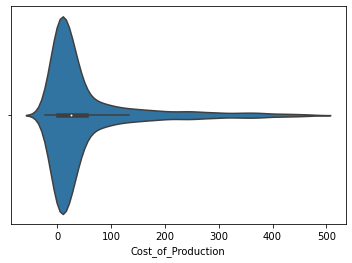

In [53]:
sns.violinplot(Default.Cost_of_Production) # plots a violin plt using the seaborn package

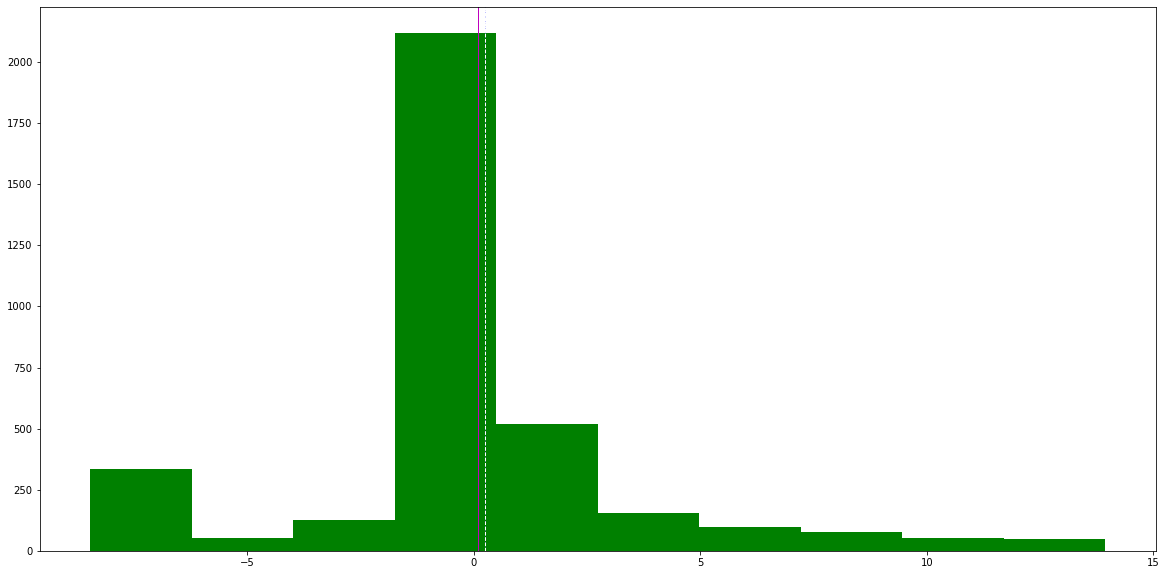

In [54]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(Default.PAT, color='g') # plots a simple histogram
plt.axvline(Default.PAT.mean(), color='m', linewidth=1)
plt.axvline(Default.PAT.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Default.PAT.mode()[0], color='w', linestyle='dashed', linewidth=1)

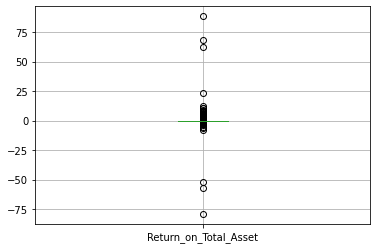

In [55]:
Default.boxplot(column=['Return_on_Total_Asset'])

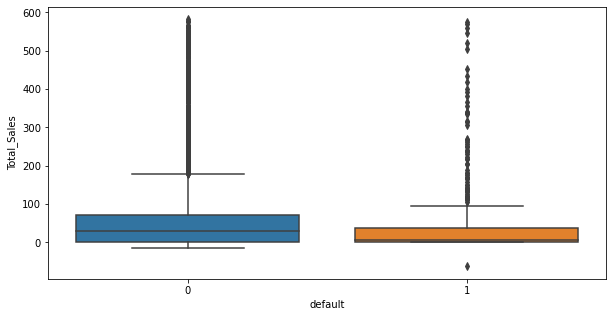

In [56]:
#Bivariate analysis
plt.figure(figsize=(10,5))
sns.boxplot(x=Default['default'],y=Default['Total_Sales'])
plt.show()

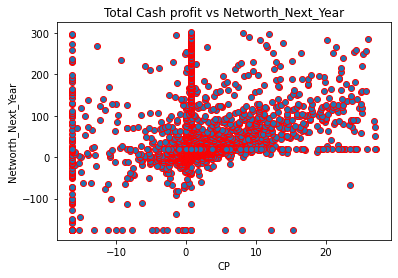

In [57]:
plt.scatter(Default['CP'], Default['Networth_Next_Year'], edgecolors='r')
plt.xlabel('CP')
plt.ylabel('Networth_Next_Year')
plt.title('Total Cash profit vs Networth_Next_Year')
plt.show()

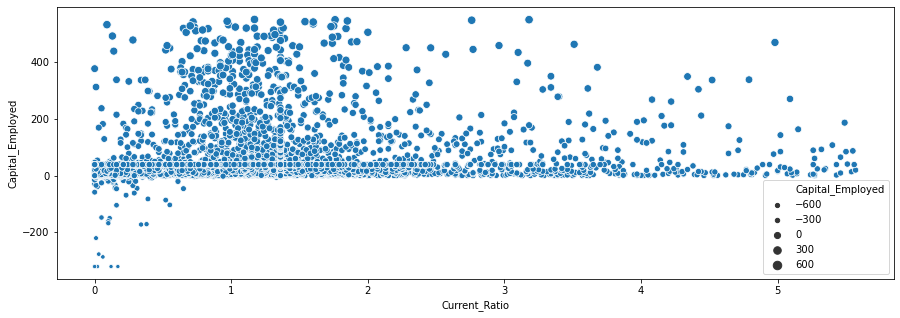

In [58]:
figure = plt.figure(figsize=(15,5))
ax = sns.scatterplot(x='Current_Ratio',y='Capital_Employed', data=Default, size = "Capital_Employed") #scatter plot

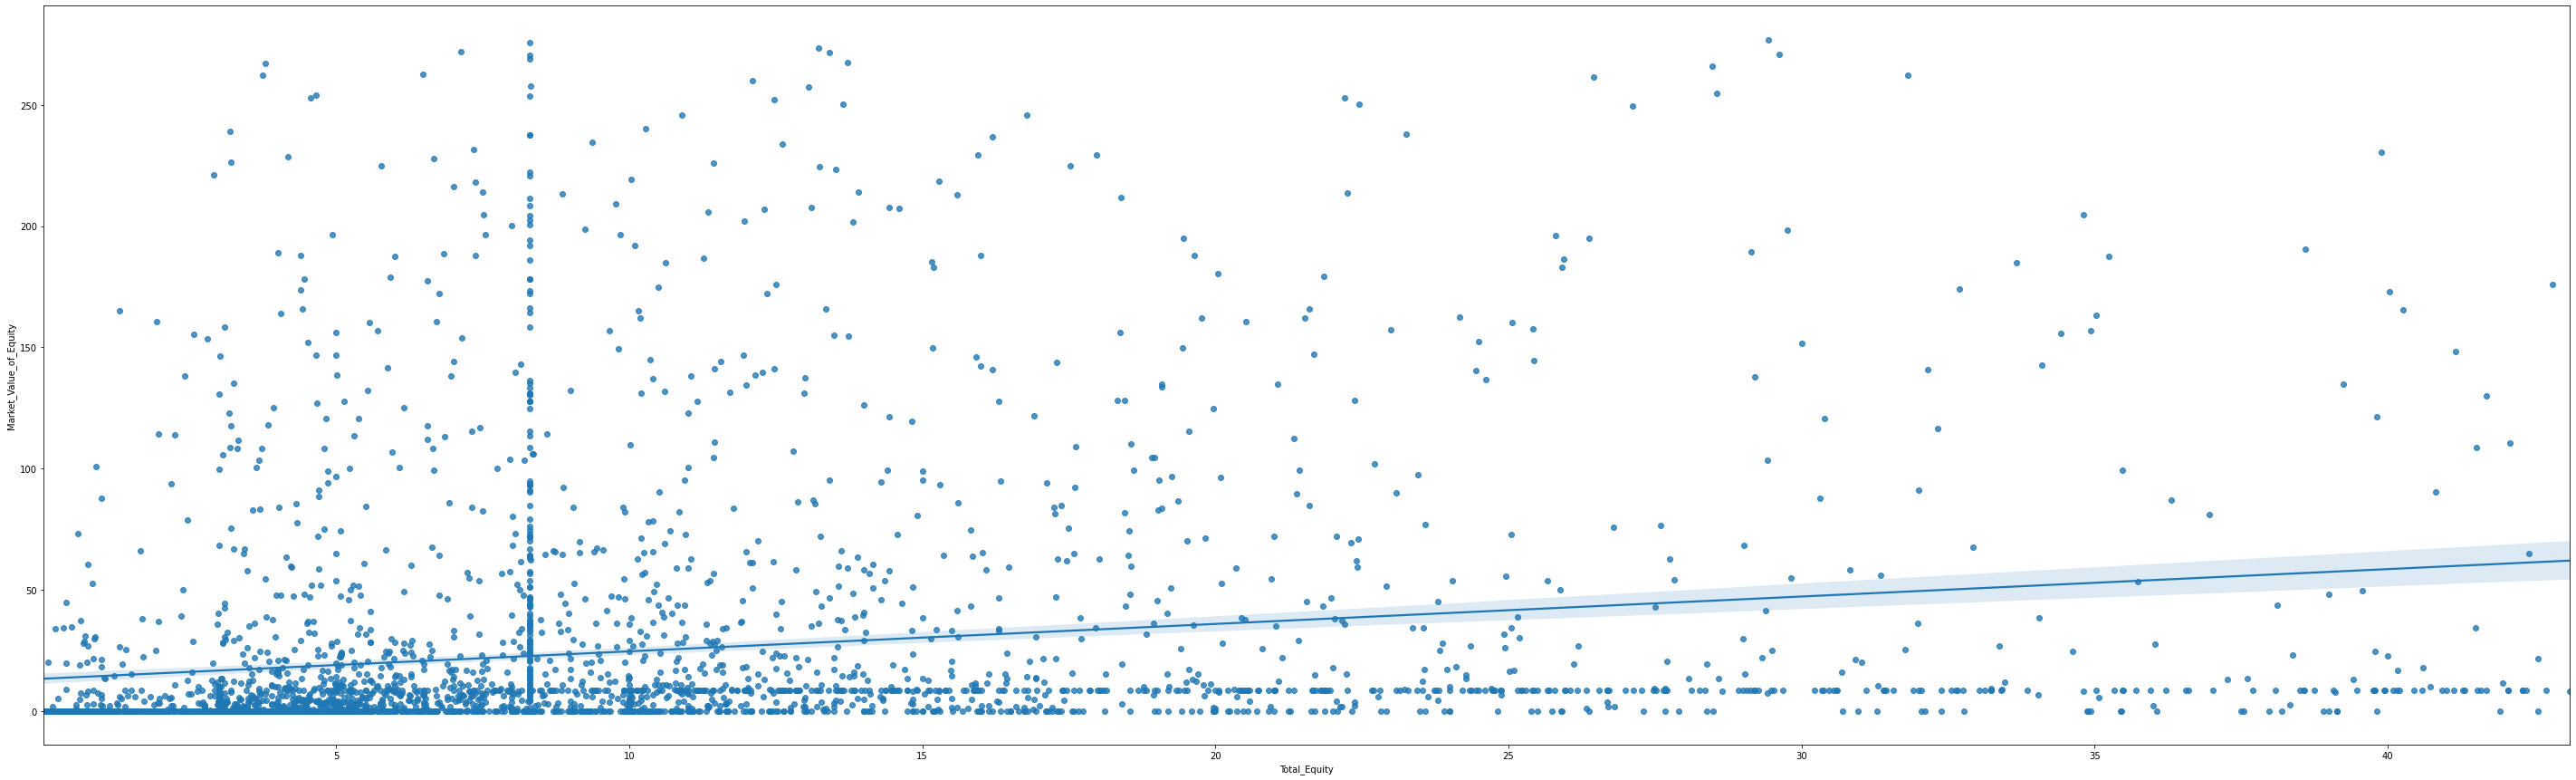

In [59]:
figure = plt.figure(figsize=(50,15))
ax = sns.regplot(x='Total_Equity',y='Market_Value_of_Equity', data=Default ) #regression plot-scatter plot with regression line

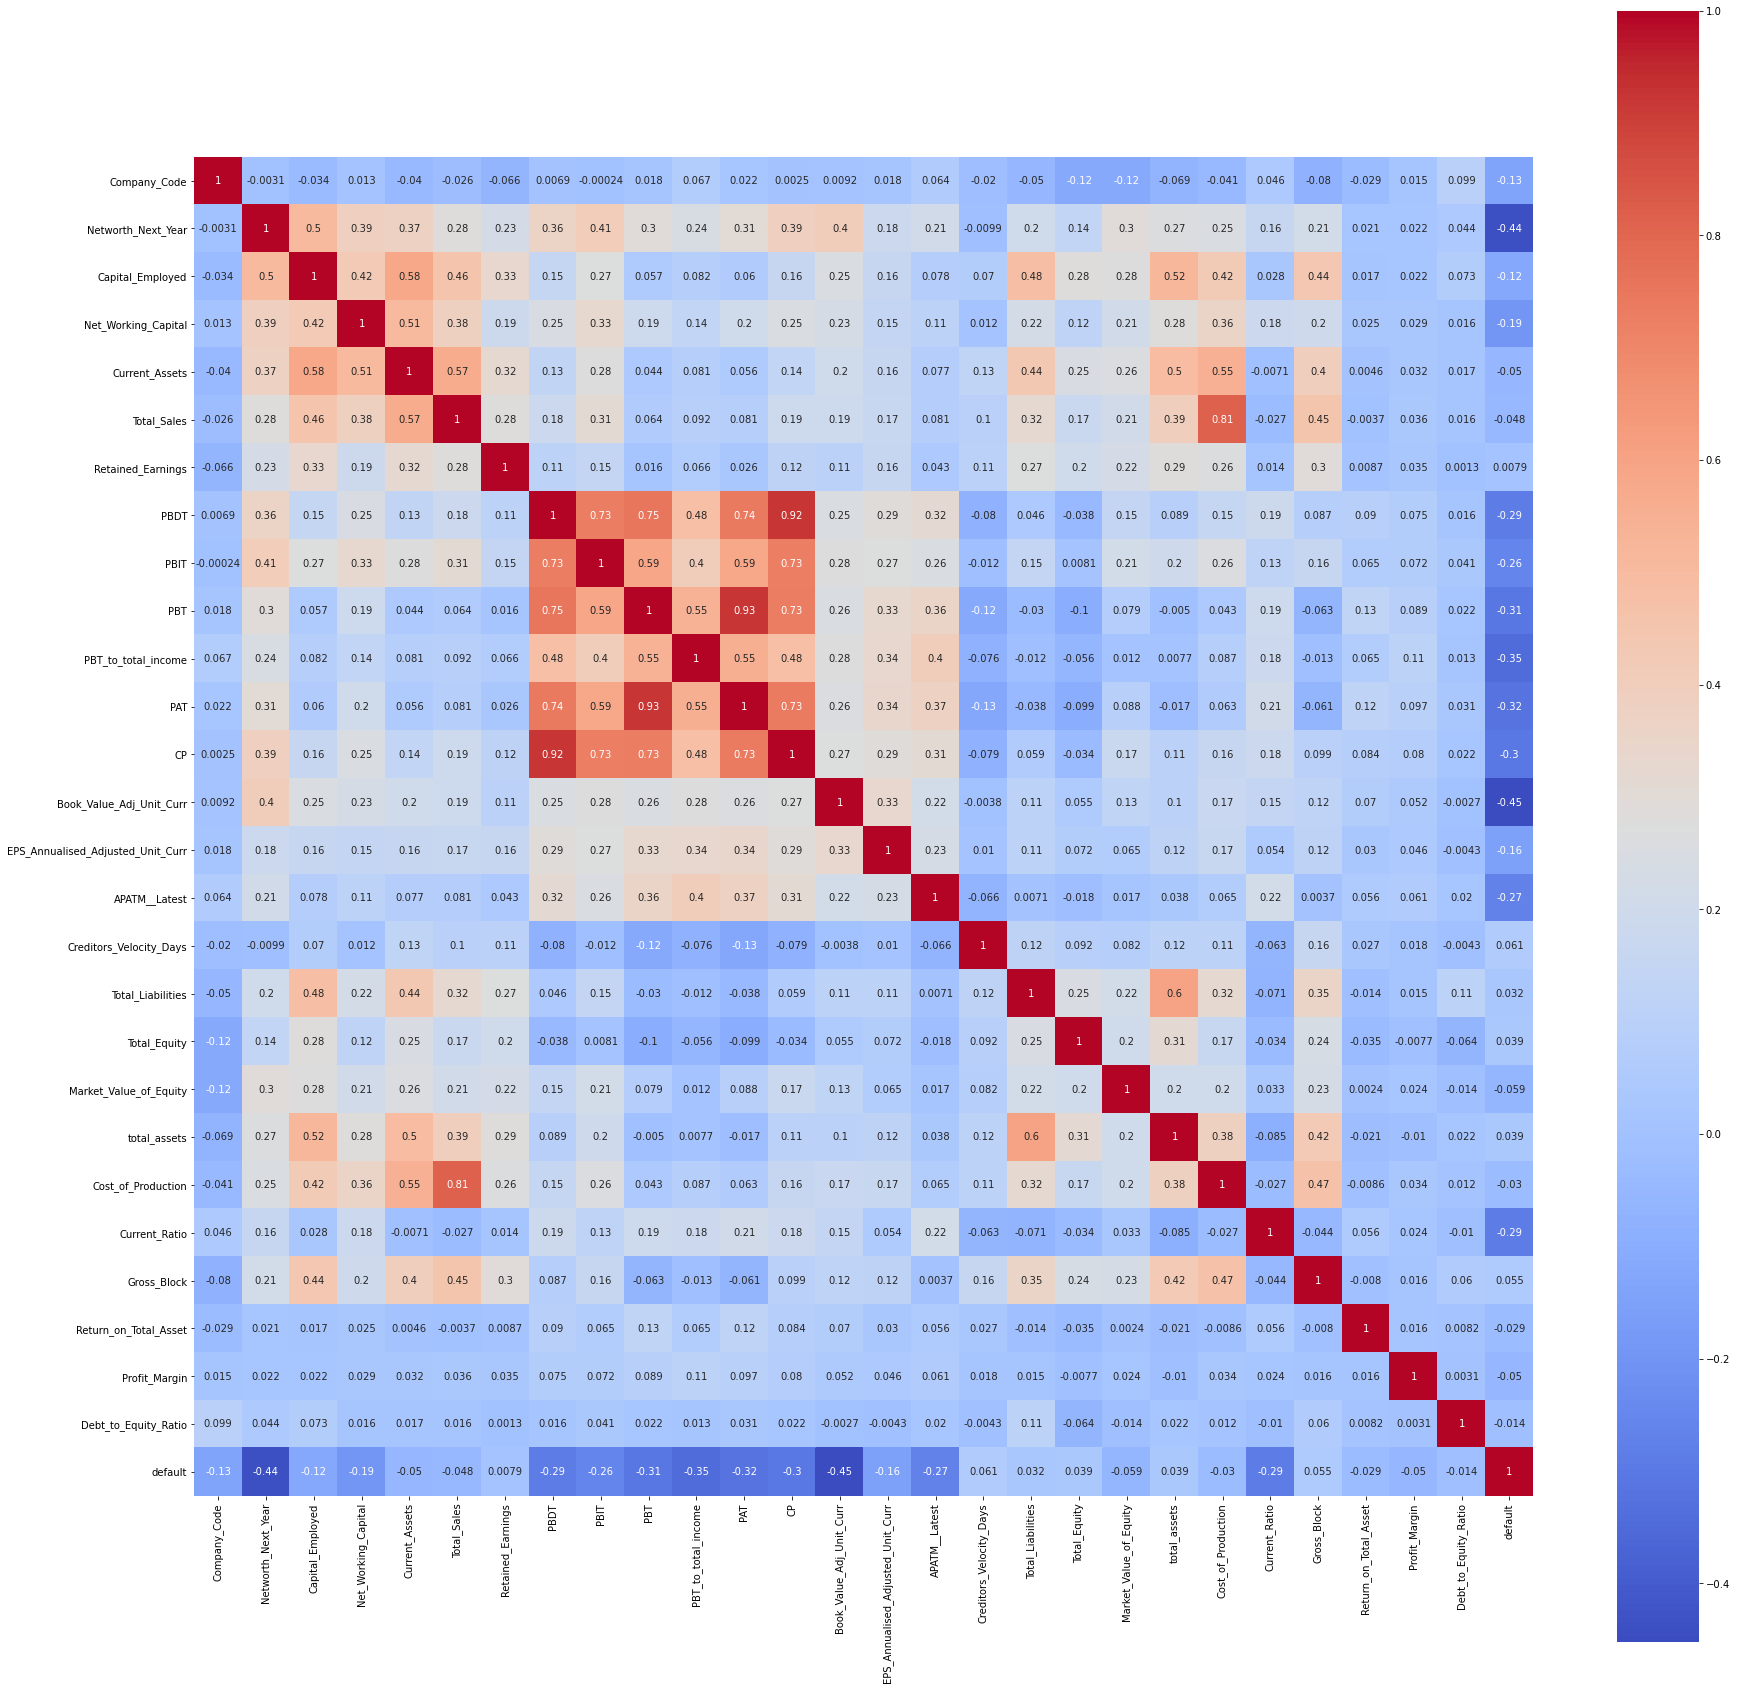

In [60]:
#Heatmap
plt.figure(figsize=(30,30))
p=sns.heatmap(Default.corr(), annot=True,cmap='coolwarm',square=True)

In [61]:
Default["default"].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [62]:
285/(2995+285)

0.08689024390243902

In [63]:
import statsmodels.formula.api as SM

In [64]:
#Perform Train Test Split
X = Default.drop(['default','Company_Code','Networth_Next_Year'], axis=1)
y = Default['default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=Default['default'])

#Statsmodel requires the labelled data, therefore, concatinating the y label to the train set.
Default_train = pd.concat([X_train,y_train], axis=1)
Default_test = pd.concat([X_test,y_test], axis=1)

In [65]:
Default_train['default'].value_counts()

0    2142
1     260
Name: default, dtype: int64

In [66]:
Default_train.default.sum() / len(Default_train.default)

0.10824313072439634

In [67]:
Default_train.head().T

,842,1057,1595,100,1191
Capital_Employed,3.540000,5.390000,13.500000,-58.300000,20.620000
Net_Working_Capital,2.940000,3.560000,13.470000,-84.100000,7.380000
Current_Assets,2.980000,3.620000,13.620000,7.690000,22.220000
Total_Sales,0.420000,1.880000,0.120000,0.760000,142.800000
Retained_Earnings,0.000000,0.720000,0.750000,0.340000,2.640000
PBDT,0.140000,0.500000,0.230000,-19.417500,1.700000
PBIT,0.030000,0.420000,0.230000,-25.038750,3.020000
PBT,0.020000,0.410000,0.230000,-11.283750,1.090000
PBT_to_total_income,0.000000,0.569444,0.306667,-6.000000,0.412879
PAT,0.010000,0.410000,0.160000,-8.460000,0.730000


In [68]:
Default_test.head().T

,251,3493,3063,2384,1679
Capital_Employed,-1.550000,39.090000,350.020000,90.880000,14.270000
Net_Working_Capital,-2.180000,10.145000,3.720000,63.820000,1.470000
Current_Assets,2.220000,24.540000,6.710000,89.340000,2.290000
Total_Sales,0.690000,30.440000,2.180000,93.970000,3.340000
Retained_Earnings,0.000000,0.450000,0.030000,0.370000,0.000000
PBDT,-0.960000,0.795000,1.660000,-4.450000,2.000000
PBIT,-0.590000,1.150000,1.610000,-3.570000,1.280000
PBT,-0.960000,0.310000,1.610000,-5.920000,1.280000
PBT_to_total_income,0.000000,1.196296,0.407000,-6.000000,0.000000
PAT,-0.960000,0.255000,1.490000,-3.570000,1.000000


In [69]:
Default_train.columns

Index(['Capital_Employed', 'Net_Working_Capital', 'Current_Assets',
       'Total_Sales', 'Retained_Earnings', 'PBDT', 'PBIT', 'PBT',
       'PBT_to_total_income', 'PAT', 'CP', 'Book_Value_Adj_Unit_Curr',
       'EPS_Annualised_Adjusted_Unit_Curr', 'APATM__Latest',
       'Creditors_Velocity_Days', 'Total_Liabilities', 'Total_Equity',
       'Market_Value_of_Equity', 'total_assets', 'Cost_of_Production',
       'Current_Ratio', 'Gross_Block', 'Return_on_Total_Asset',
       'Profit_Margin', 'Debt_to_Equity_Ratio', 'default'],
      dtype='object')

In [70]:
#Build a Logistic Regression Model on most important variables on Train Dataset
model_1 = SM.logit(formula = 'default ~ Capital_Employed + Retained_Earnings + PBT_to_total_income + CP + Book_Value_Adj_Unit_Curr + EPS_Annualised_Adjusted_Unit_Curr + Market_Value_of_Equity + Cost_of_Production + Current_Ratio + Gross_Block + Return_on_Total_Asset + Profit_Margin + Debt_to_Equity_Ratio', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.128732
         Iterations 10


In [71]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2388
Method:                           MLE   Df Model:                           13
Date:                Thu, 03 Sep 2020   Pseudo R-squ.:                  0.6245
Time:                        19:52:37   Log-Likelihood:                -309.22
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.316e-211
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.2760      0.199     -1.387      0.165      -0.666       0.114
Capital_Employed                     -0.0030      0.002     -1.548      0.122      -0.007       0.001
Retained_Earnings                     0.1055      0.082      1.281      0.200      -0.056       0.267
PBT_to_total_income                  -0.1952      0.043     -4.524      0.000      -0.280      -0.111
CP                                   -0.0622      0.023     -2.701      0.007      -0.107      -0.017
Book_Value_Adj_Unit_Curr             -0.1373      0.011    -12.725      0.000      -0.158      -0.116
EPS_Annualised_Adjusted_Unit_Curr     0.1033      0.104      0.991      0.322      -0.101       0.308
Market_Value_of_Equity               -0.0055      0.004     -1.542      0.123      -0.013       0.001
Cost_of_Production                    0.0023      0.002      1.190      0.234      -0.002       0.006
Current_Ratio                        -1.1821      0.159     -7.442      0.000      -1.493      -0.871
Gross_Block                           0.0059      0.002      2.416      0.016       0.001       0.011
Return_on_Total_Asset                 0.0941      0.023      4.122      0.000       0.049       0.139
Profit_Margin                         0.0120      0.013      0.898      0.369      -0.014       0.038
Debt_to_Equity_Ratio                 -0.0419      0.013     -3.138      0.002      -0.068      -0.016
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [72]:
model_2 = SM.logit(formula = 'default ~ Capital_Employed + Retained_Earnings + PBT_to_total_income + CP + Book_Value_Adj_Unit_Curr + EPS_Annualised_Adjusted_Unit_Curr + Market_Value_of_Equity + Cost_of_Production + Current_Ratio + Gross_Block + Return_on_Total_Asset + Debt_to_Equity_Ratio', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.128919
         Iterations 10


In [73]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2389
Method:                           MLE   Df Model:                           12
Date:                Thu, 03 Sep 2020   Pseudo R-squ.:                  0.6240
Time:                        19:52:38   Log-Likelihood:                -309.66
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.166e-212
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.2822      0.198     -1.424      0.154      -0.671       0.106
Capital_Employed                     -0.0029      0.002     -1.510      0.131      -0.007       0.001
Retained_Earnings                     0.1081      0.082      1.320      0.187      -0.052       0.269
PBT_to_total_income                  -0.1909      0.043     -4.450      0.000      -0.275      -0.107
CP                                   -0.0601      0.023     -2.639      0.008      -0.105      -0.015
Book_Value_Adj_Unit_Curr             -0.1370      0.011    -12.737      0.000      -0.158      -0.116
EPS_Annualised_Adjusted_Unit_Curr     0.1023      0.104      0.984      0.325      -0.101       0.306
Market_Value_of_Equity               -0.0054      0.004     -1.521      0.128      -0.012       0.002
Cost_of_Production                    0.0023      0.002      1.200      0.230      -0.001       0.006
Current_Ratio                        -1.1882      0.158     -7.516      0.000      -1.498      -0.878
Gross_Block                           0.0059      0.002      2.432      0.015       0.001       0.011
Return_on_Total_Asset                 0.0939      0.023      4.129      0.000       0.049       0.138
Debt_to_Equity_Ratio                 -0.0418      0.013     -3.140      0.002      -0.068      -0.016
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [74]:
model_3 = SM.logit(formula = 'default ~ Capital_Employed + Retained_Earnings + PBT_to_total_income + CP + Book_Value_Adj_Unit_Curr + Market_Value_of_Equity + Cost_of_Production + Current_Ratio + Gross_Block + Return_on_Total_Asset + Debt_to_Equity_Ratio', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.129106
         Iterations 10


In [75]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2390
Method:                           MLE   Df Model:                           11
Date:                Thu, 03 Sep 2020   Pseudo R-squ.:                  0.6234
Time:                        19:52:38   Log-Likelihood:                -310.11
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                3.421e-213
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.2560      0.196     -1.307      0.191      -0.640       0.128
Capital_Employed            -0.0029      0.002     -1.505      0.132      -0.007       0.001
Retained_Earnings            0.1164      0.081      1.429      0.153      -0.043       0.276
PBT_to_total_income         -0.1840      0.042     -4.361      0.000      -0.267      -0.101
CP                          -0.0577      0.023     -2.554      0.011      -0.102      -0.013
Book_Value_Adj_Unit_Curr    -0.1362      0.011    -12.748      0.000      -0.157      -0.115
Market_Value_of_Equity      -0.0055      0.004     -1.550      0.121      -0.013       0.001
Cost_of_Production           0.0025      0.002      1.272      0.203      -0.001       0.006
Current_Ratio               -1.1805      0.157     -7.516      0.000      -1.488      -0.873
Gross_Block                  0.0060      0.002      2.429      0.015       0.001       0.011
Return_on_Total_Asset        0.0930      0.023      4.112      0.000       0.049       0.137
Debt_to_Equity_Ratio        -0.0418      0.013     -3.153      0.002      -0.068      -0.016
============================================================================================

Possibly complete quasi-separation: A fraction 0.19 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [76]:
model_4 = SM.logit(formula = 'default ~ Capital_Employed + Retained_Earnings + PBT_to_total_income + CP + Book_Value_Adj_Unit_Curr + Market_Value_of_Equity + Current_Ratio + Gross_Block + Return_on_Total_Asset + Debt_to_Equity_Ratio', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.129433
         Iterations 10


In [77]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2391
Method:                           MLE   Df Model:                           10
Date:                Thu, 03 Sep 2020   Pseudo R-squ.:                  0.6225
Time:                        19:52:38   Log-Likelihood:                -310.90
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                7.165e-214
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.2489      0.195     -1.276      0.202      -0.631       0.133
Capital_Employed            -0.0022      0.002     -1.216      0.224      -0.006       0.001
Retained_Earnings            0.1238      0.080      1.537      0.124      -0.034       0.282
PBT_to_total_income         -0.1814      0.042     -4.328      0.000      -0.264      -0.099
CP                          -0.0569      0.022     -2.543      0.011      -0.101      -0.013
Book_Value_Adj_Unit_Curr    -0.1355      0.011    -12.740      0.000      -0.156      -0.115
Market_Value_of_Equity      -0.0053      0.004     -1.499      0.134      -0.012       0.002
Current_Ratio               -1.1697      0.156     -7.503      0.000      -1.475      -0.864
Gross_Block                  0.0069      0.002      2.978      0.003       0.002       0.011
Return_on_Total_Asset        0.0913      0.022      4.168      0.000       0.048       0.134
Debt_to_Equity_Ratio        -0.0414      0.013     -3.162      0.002      -0.067      -0.016
============================================================================================

Possibly complete quasi-separation: A fraction 0.19 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [78]:
model_5 = SM.logit(formula = 'default ~ Retained_Earnings + PBT_to_total_income + CP + Book_Value_Adj_Unit_Curr + Market_Value_of_Equity + Current_Ratio + Gross_Block + Return_on_Total_Asset + Debt_to_Equity_Ratio', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.129764
         Iterations 10


In [79]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2392
Method:                           MLE   Df Model:                            9
Date:                Thu, 03 Sep 2020   Pseudo R-squ.:                  0.6215
Time:                        19:52:39   Log-Likelihood:                -311.69
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.439e-214
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.2457      0.195     -1.260      0.208      -0.628       0.137
Retained_Earnings            0.1158      0.079      1.473      0.141      -0.038       0.270
PBT_to_total_income         -0.1837      0.042     -4.405      0.000      -0.265      -0.102
CP                          -0.0536      0.022     -2.447      0.014      -0.097      -0.011
Book_Value_Adj_Unit_Curr    -0.1368      0.011    -12.882      0.000      -0.158      -0.116
Market_Value_of_Equity      -0.0059      0.003     -1.690      0.091      -0.013       0.001
Current_Ratio               -1.1932      0.155     -7.686      0.000      -1.497      -0.889
Gross_Block                  0.0057      0.002      2.717      0.007       0.002       0.010
Return_on_Total_Asset        0.0881      0.021      4.137      0.000       0.046       0.130
Debt_to_Equity_Ratio        -0.0441      0.013     -3.403      0.001      -0.069      -0.019
============================================================================================

Possibly complete quasi-separation: A fraction 0.19 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [80]:
model_6 = SM.logit(formula = 'default ~ PBT_to_total_income + CP + Book_Value_Adj_Unit_Curr + Market_Value_of_Equity + Current_Ratio + Gross_Block + Return_on_Total_Asset + Debt_to_Equity_Ratio', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.130182
         Iterations 10


In [81]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2393
Method:                           MLE   Df Model:                            8
Date:                Thu, 03 Sep 2020   Pseudo R-squ.:                  0.6203
Time:                        19:52:39   Log-Likelihood:                -312.70
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                3.339e-215
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.2103      0.193     -1.088      0.276      -0.589       0.168
PBT_to_total_income         -0.1800      0.042     -4.331      0.000      -0.261      -0.099
CP                          -0.0540      0.022     -2.453      0.014      -0.097      -0.011
Book_Value_Adj_Unit_Curr    -0.1348      0.010    -12.906      0.000      -0.155      -0.114
Market_Value_of_Equity      -0.0053      0.003     -1.522      0.128      -0.012       0.002
Current_Ratio               -1.1988      0.155     -7.746      0.000      -1.502      -0.895
Gross_Block                  0.0067      0.002      3.369      0.001       0.003       0.011
Return_on_Total_Asset        0.0879      0.021      4.154      0.000       0.046       0.129
Debt_to_Equity_Ratio        -0.0429      0.013     -3.338      0.001      -0.068      -0.018
============================================================================================

Possibly complete quasi-separation: A fraction 0.19 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [82]:
model_7 = SM.logit(formula = 'default ~ PBT_to_total_income + CP + Book_Value_Adj_Unit_Curr + Current_Ratio + Gross_Block + Return_on_Total_Asset + Debt_to_Equity_Ratio', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.130736
         Iterations 10


In [83]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2394
Method:                           MLE   Df Model:                            7
Date:                Thu, 03 Sep 2020   Pseudo R-squ.:                  0.6187
Time:                        19:52:39   Log-Likelihood:                -314.03
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.003e-215
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.2439      0.192     -1.268      0.205      -0.621       0.133
PBT_to_total_income         -0.1811      0.041     -4.367      0.000      -0.262      -0.100
CP                          -0.0517      0.022     -2.390      0.017      -0.094      -0.009
Book_Value_Adj_Unit_Curr    -0.1365      0.010    -13.079      0.000      -0.157      -0.116
Current_Ratio               -1.2129      0.155     -7.809      0.000      -1.517      -0.909
Gross_Block                  0.0059      0.002      3.129      0.002       0.002       0.010
Return_on_Total_Asset        0.0889      0.022      4.132      0.000       0.047       0.131
Debt_to_Equity_Ratio        -0.0439      0.013     -3.399      0.001      -0.069      -0.019
============================================================================================

Possibly complete quasi-separation: A fraction 0.19 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [84]:
y_prob_pred_train = model_7.predict(Default_train)
y_prob_pred_train

842     0.033658
1057    0.028439
1595    0.104125
100     0.948612
1191    0.126278
          ...   
1815    0.030408
2852    0.195643
1505    0.044675
375     0.278877
3428    0.000022
Length: 2402, dtype: float64

In [85]:
#State the accuracy, specificity, and sensitivity of the model based upon the optimized cutoff value
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['default'],y_prob_pred_train)

In [86]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.11415763529402564

In [87]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.11415763529402564:
        a=1
    else:
        a=0
    y_class_pred.append(a)

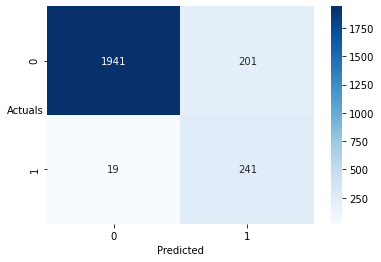

In [88]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [89]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.990     0.906     0.946      2142
           1      0.545     0.927     0.687       260

    accuracy                          0.908      2402
   macro avg      0.768     0.917     0.816      2402
weighted avg      0.942     0.908     0.918      2402



In [90]:
#Validate the Model on Test Dataset and state the performance matrices
y_prob_pred_test = model_7.predict(Default_test)
y_prob_pred_test

251     9.088190e-01
3493    7.934707e-03
3063    1.003487e-09
2384    1.228572e-03
1679    5.848031e-03
            ...     
1321    3.239139e-08
2666    1.995532e-07
773     9.290209e-02
3488    6.238636e-08
2956    2.515418e-06
Length: 1184, dtype: float64

In [91]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.11415763529402564:
        a=1
    else:
        a=0
    y_class_pred.append(a)

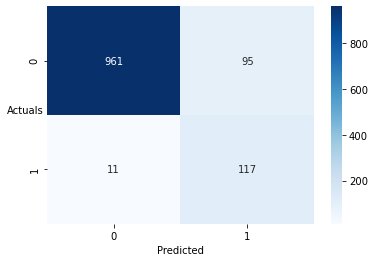

In [92]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [93]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.989     0.910     0.948      1056
           1      0.552     0.914     0.688       128

    accuracy                          0.910      1184
   macro avg      0.770     0.912     0.818      1184
weighted avg      0.941     0.910     0.920      1184



In [94]:
#Find out the Altzman Score on test and train dataset
Default_train['Altman_score']=1.2*(Default_train.Net_Working_Capital/Default_train.total_assets)+1.4*(Default_train.Retained_Earnings/Default_train.total_assets)+3.3*(Default_train.PBDT/Default_train.total_assets)+0.6*(Default_train.Market_Value_of_Equity/Default_train.total_assets)+0.999*(Default_train.Total_Sales/Default_train.total_assets)
Default_train['Altman_score']

842      1.336236
1057     1.846566
1595    13.205274
100     -2.130100
1191     8.773552
          ...    
1815     0.883500
2852     5.259503
1505     0.661074
375      0.768319
3428     2.462908
Name: Altman_score, Length: 2402, dtype: float64

In [95]:
Default_test['Altman_score']=1.2*(Default_test.Net_Working_Capital/Default_test.total_assets)+1.4*(Default_test.Retained_Earnings/Default_test.total_assets)+3.3*(Default_test.PBDT/Default_test.total_assets)+0.6*(Default_test.Market_Value_of_Equity/Default_test.total_assets)+0.999*(Default_test.Total_Sales/Default_test.total_assets)
Default_test['Altman_score']

251    -0.299146
3493    2.462908
3063    2.542153
2384    7.515514
1679    5.892831
          ...   
1321    3.189736
2666    5.417415
773     0.218224
3488    2.462908
2956    4.967740
Name: Altman_score, Length: 1184, dtype: float64

In [96]:
Default_train['Altman_score'].describe()

count    2402.000000
mean        8.294490
std        68.049937
min      -364.359000
25%         0.783634
50%         2.462908
75%         5.680021
max      2239.212333
Name: Altman_score, dtype: float64

In [97]:
Default_test['Altman_score'].describe()

count    1184.000000
mean        6.924922
std        33.193595
min       -11.121097
25%         0.823207
50%         2.464525
75%         5.739661
max       963.270515
Name: Altman_score, dtype: float64

In [98]:
alt_class_pred=[]
for i in range(0,len(Default_train['Altman_score'])):
    if np.array(Default_train['Altman_score'])[i]<0.11415763529402564:
        a=1
    else:
        a=0
    alt_class_pred.append(a)

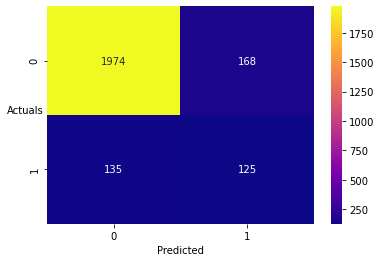

In [99]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],alt_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [100]:
print(metrics.classification_report(Default_train['default'],alt_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.936     0.922     0.929      2142
           1      0.427     0.481     0.452       260

    accuracy                          0.874      2402
   macro avg      0.681     0.701     0.690      2402
weighted avg      0.881     0.874     0.877      2402



In [101]:
alt_class_pred=[]
for i in range(0,len(Default_test['Altman_score'])):
    if np.array(Default_test['Altman_score'])[i]<0.11415763529402564:
        a=1
    else:
        a=0
    alt_class_pred.append(a)

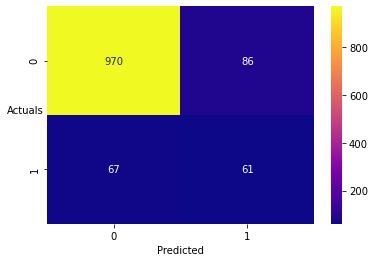

In [102]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],alt_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [103]:
print(metrics.classification_report(Default_test['default'],alt_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.935     0.919     0.927      1056
           1      0.415     0.477     0.444       128

    accuracy                          0.871      1184
   macro avg      0.675     0.698     0.685      1184
weighted avg      0.879     0.871     0.875      1184



In [104]:
#Market Risk - Part 2
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [105]:
stock_prices.columns = stock_prices.columns.str.strip().str.replace(' ', '_')
stock_prices.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [106]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [107]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [108]:
stock_prices.describe()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


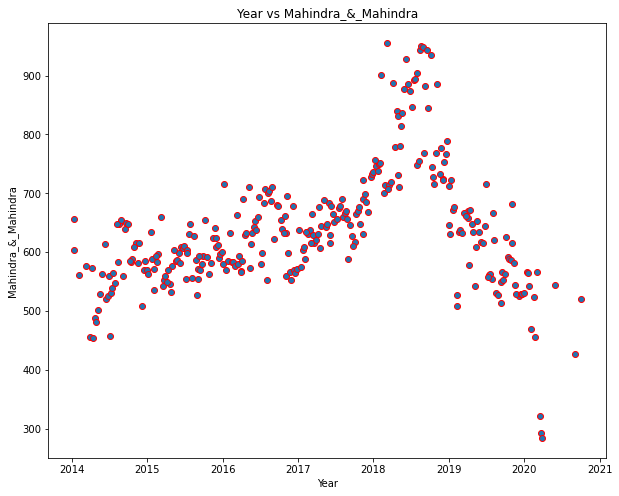

In [109]:
#Draw Stock Price Chart for any 2 variables
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Mahindra_&_Mahindra'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Mahindra_&_Mahindra')
plt.title('Year vs Mahindra_&_Mahindra')
plt.show()

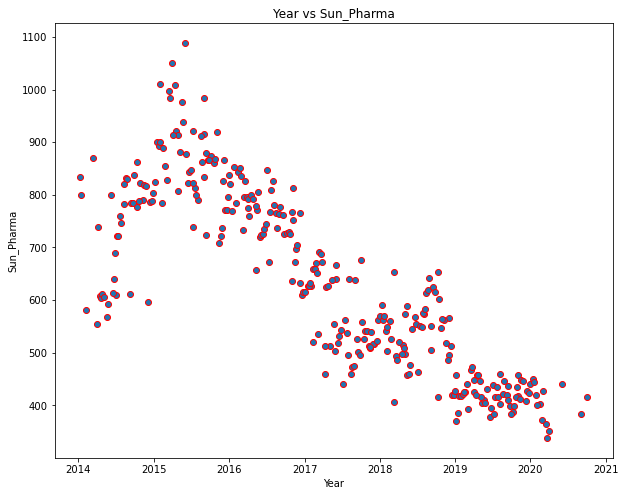

In [110]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Sun_Pharma'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Sun_Pharma')
plt.title('Year vs Sun_Pharma')
plt.show()

In [111]:
#Calculate Returns
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [112]:
print('The number of rows (observations) is',stock_returns.shape[0],'\n''The number of columns (variables) is',stock_returns.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 10


In [113]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [114]:
#Calculate Stock Means and Standard Deviation
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.002794
Indian_Hotel           0.000266
Mahindra_&_Mahindra   -0.001506
Axis_Bank              0.001167
SAIL                  -0.003463
Shree_Cement           0.003681
Sun_Pharma            -0.001455
Jindal_Steel          -0.004123
Idea_Vodafone         -0.010608
Jet_Airways           -0.009548
dtype: float64

In [115]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys                0.035070
Indian_Hotel           0.047131
Mahindra_&_Mahindra    0.040169
Axis_Bank              0.045828
SAIL                   0.062188
Shree_Cement           0.039917
Sun_Pharma             0.045033
Jindal_Steel           0.075108
Idea_Vodafone          0.104315
Jet_Airways            0.097972
dtype: float64

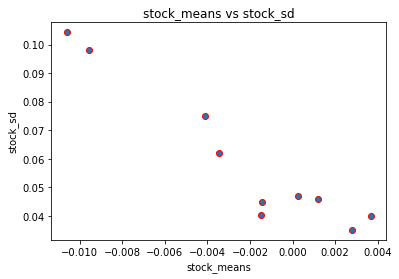

In [116]:
#Draw a plot of Stock Means vs Standard Deviation
plt.scatter(stock_means, stock_sd, edgecolors='r')
plt.xlabel('stock_means')
plt.ylabel('stock_sd')
plt.title('stock_means vs stock_sd')
plt.show()